In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [70]:
#ARIMA - AutoRegressive Moving Average and adds the notion of integration.
#AR-> AutoRegression
#I -> Integration
#MA -> Moving Average

In [66]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [6]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
df['Month']=pd.to_datetime(df['Month'])

In [12]:
df.dtypes

Month                      datetime64[ns]
Thousands of Passengers             int64
dtype: object

In [14]:
df.head(2)

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118


In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head(1)

,Thousands of Passengers
Month,
1949-01-01,112


<AxesSubplot:xlabel='Month'>

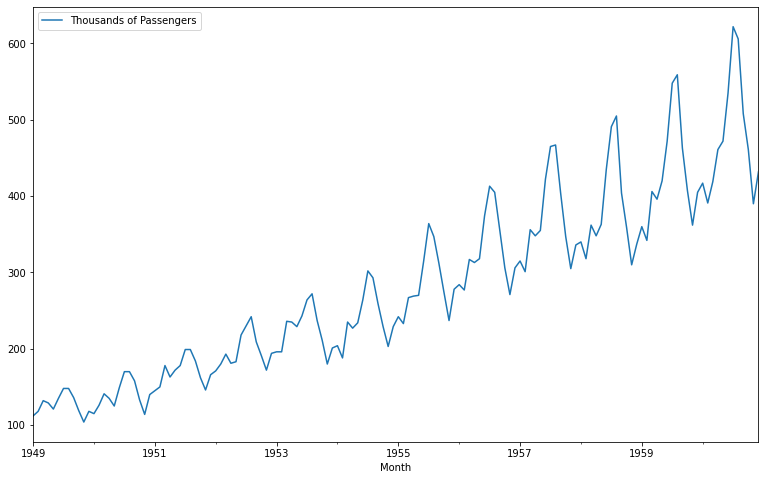

In [20]:
df.plot(figsize=(13,8))

In [21]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def adfuller_test(series):
    results=adfuller(series)
    print('ADF Statictics: {}'.format(results[0]))
    print('P-Value: {}'.format(results[1]))
    if results[1] <= 0.05:
        print('There are strong evidence again null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('Weak evidence again null hypothesis, time series has a unit root, indicating it is non-stationary')

In [31]:
adfuller_test(df['Thousands of Passengers'])

ADF Statictics: 0.8153688792060482
P-Value: 0.991880243437641
Weak evidence again null hypothesis, time series has a unit root, indicating it is non-stationary


In [32]:
#### Use Differencing technique
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)    

In [33]:
adfuller_test(df['Passengers First Difference'].dropna())

ADF Statictics: -2.8292668241699994
P-Value: 0.0542132902838255
Weak evidence again null hypothesis, time series has a unit root, indicating it is non-stationary


In [34]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)    

In [37]:
df.head(3)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0


In [39]:
adfuller_test((df['Passengers Second Difference']).dropna())

ADF Statictics: -16.384231542468505
P-Value: 2.7328918500142407e-29
There are strong evidence again null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [40]:
## 12 months
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [41]:
adfuller_test((df['Passengers 12 Difference']).dropna())

ADF Statictics: -3.383020726492481
P-Value: 0.011551493085514952
There are strong evidence again null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


#### For First difference

<AxesSubplot:xlabel='Month'>

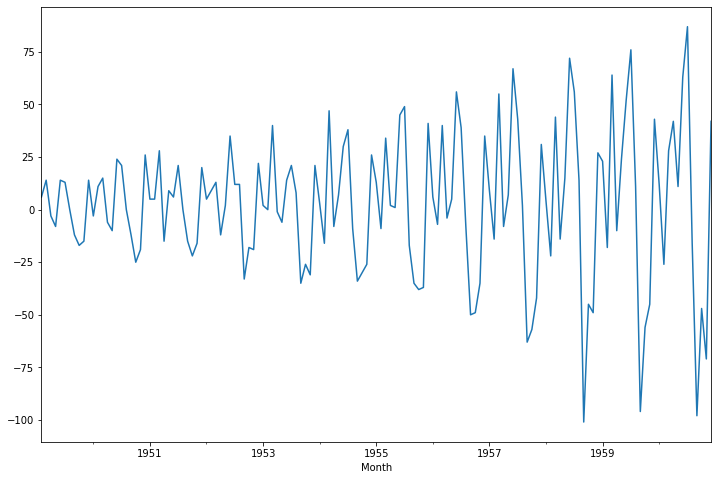

In [47]:
df['Passengers First Difference'].dropna().plot(figsize=(12,8))

#### For Second difference

<AxesSubplot:xlabel='Month'>

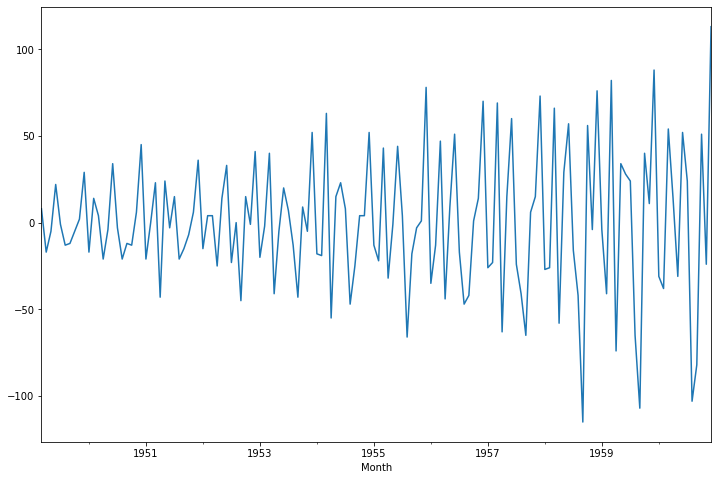

In [48]:
df['Passengers Second Difference'].dropna().plot(figsize=(12,8))

#### For 12 months as it it seasonla data

<AxesSubplot:xlabel='Month'>

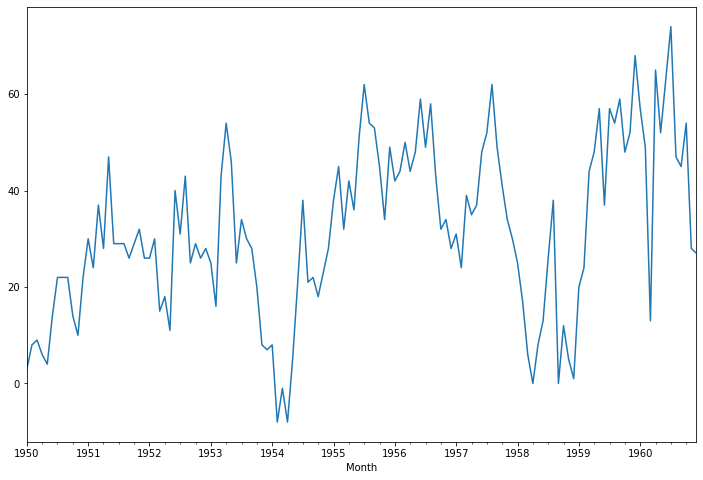

In [49]:
df['Passengers 12 Difference'].dropna().plot(figsize=(12,8))

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### AutoCorrelation Function plot

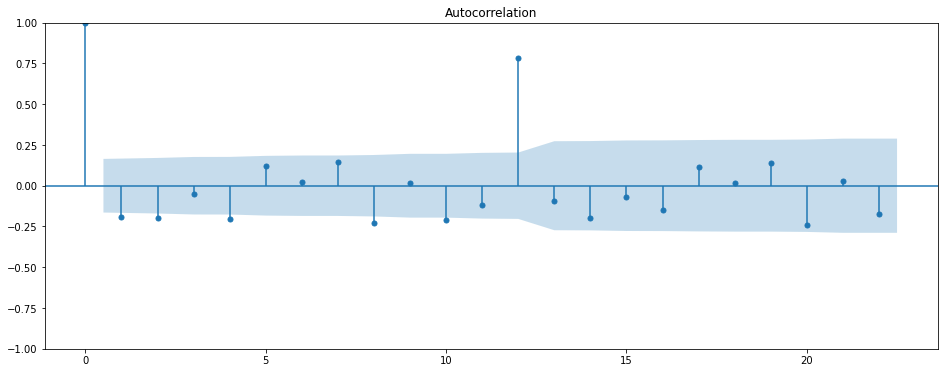

In [79]:
#Performing MA -> q value
plt.rcParams['figure.figsize']=16,6
acf= plot_acf(df['Passengers Second Difference'].dropna())


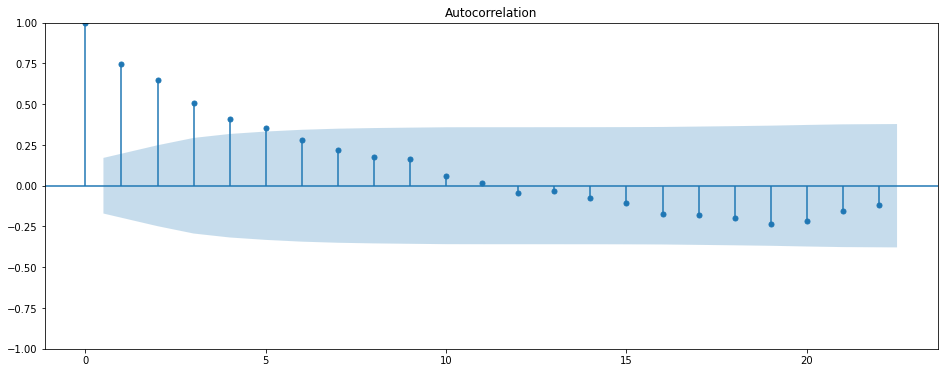

In [71]:
acf12=plot_acf(df['Passengers 12 Difference'].dropna())
#for seasonal data we should use SARIMAX model
#q value can be 5 or 6

### Partial AutoCorrelation Function plot

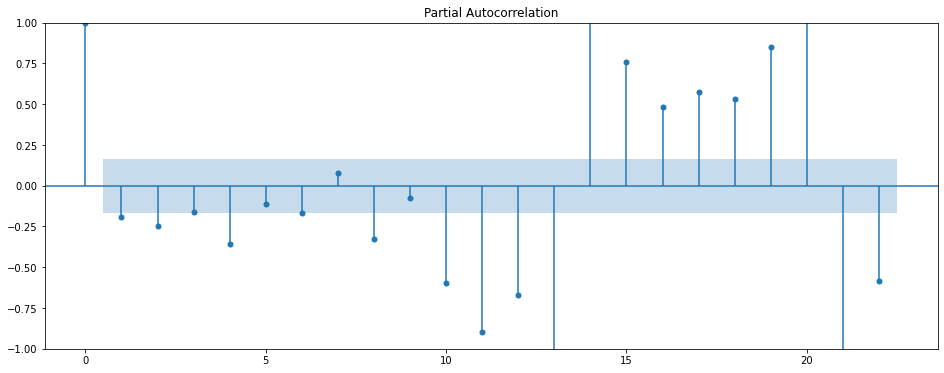

In [78]:
#performing AR -> p value
pacf=plot_pacf(df['Passengers Second Difference'].dropna())

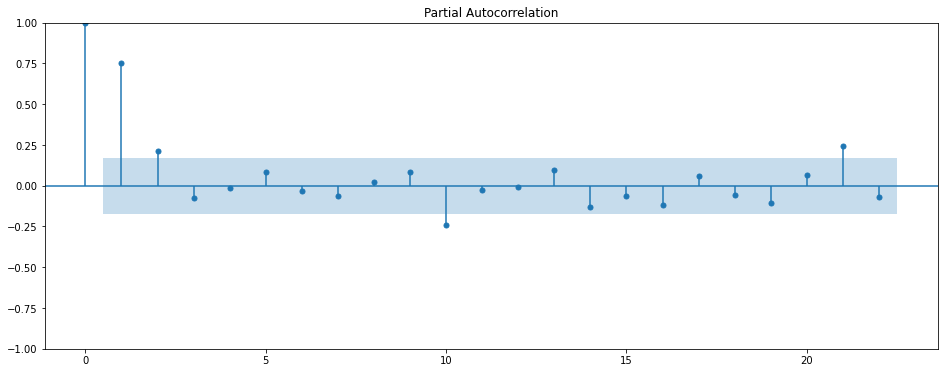

In [74]:
pacf12=plot_pacf(df['Passengers 12 Difference'].dropna())
#try p value with 2 or 3 and next 10 so on